# Setting Everything Up

In [1]:
import pandas as pd

In [2]:
# I can give a number or use None to remove maximum ceiling & display all columns
pd.options.display.max_columns = None

# # I want to be able to see the entire narrative, so remove the maximum width for each column
# pd.options.display.max_colwidth = None

# pd.options.display.float_format = '{:,.0f}'.format

%matplotlib inline

In [3]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (8, 8)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [4]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [5]:
%%R

# My commonly used R imports

require('tidyverse')

R[write to console]: Loading required package: tidyverse



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.3.0      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 1.0.0 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [6]:
%%R

library(jpeg)
library(RColorBrewer)


In [7]:
%%R
library(plotly)
library(ggrepel)
#for timeline plotting

R[write to console]: 
Attaching package: ‘plotly’


R[write to console]: The following object is masked from ‘package:ggplot2’:

    last_plot


R[write to console]: The following object is masked from ‘package:stats’:

    filter


R[write to console]: The following object is masked from ‘package:graphics’:

    layout




The question I am interested in is:

# How do different variables affect education outcomes in Kenya

### Background for how I got to this moment in the analysis:
If you would like to see the data I am using, check the csv in this repository titled: [df_edu_no_total_updated.csv](https://github.com/ivynyayieka/education_outcomes/blob/main/df_edu_no_total_updated.csv) <br />
If you would like to see the process of collecting and cleaning the data and its various sources, check the notebook in this repository titled: [education_regressions_collecting_and_cleaning_data.ipynb](https://github.com/ivynyayieka/education_outcomes/blob/main/education_regressions_collecting_and_cleaning_data.ipynb) <br />
If you would like to see the basic exploratory plotting of the resulting data and some preliminary observations from the data, check the notebook in this repository titled: [education_basic_plotting.ipynb](https://github.com/ivynyayieka/education_outcomes/blob/main/education_basic_plotting.ipynb) <br />


# Reading the data

In [8]:
df_kenya_education=pd.read_csv("df_edu_no_total_updated.csv")
df_kenya_education

,Unnamed: 0.2,County,equitable_share_2020_21,equitable_share_2021_22_plus,conditional_grant_2020_21,conditional_grant_2021_22_plus,annual_own_source_revenue_2020_21,annual_own_source_revenue_2021_22_plus,total_revenue_2020_21,total_revenue_2021_22_plus,number_x,county,number_of_schools,total_enrolment,average_school_size,place,population,land_area_km_sq,pop_density_per_km_sq,county_ptr,public_enrolment,public_teachers,public_PTR,private_enrolment,private_teachers,private_PTR,overall_public_plus_private_enrolment,public_over_overall_enrolment_as_pct,overall_pri_ptr_county,overall_pri_ptr_enrolment,overall_pri_ptr_teachers,overall_pri_ptr_PTR,txtbk_no,txtbk_county,txtbk_grade_1,txtbk_grade_2,txtbk_grade_3,pupil_textbook_ratio,s_number_elec,county_elec,national_grid,solar,no_power,elec_table_total,no_power_pct,with_power_pct,with_national_grid_pct,complete_dig_SN,complete_dig_county,number_of_pri_schools_by_2016,number_of_schools_w_complete_digital_devices,pct_installed,detailed_digi_SN,detailed_digi_county,installed_learner_digi_devices,installed_learner_digi_devices.1,Installed_digi_content_server_and_wireless_routers,installed_projectors,installed_special_needs_edu_devices,nasmla_number,nasmla_county,mathematics_mean,mathematics_SE,english_mean,english_SE,kiswahili_mean,kiswahili_SE,county_lower,Unnamed: 0.1,name,capital,code,sub_counties,sub_counties_lower,Place_county_or_subcounty,total_and_gender,number_y,dont_know_number,dont_know_number_percent,not_stated_number,at_school_or_learning_institution_number,at_school_or_learning_institution_pct,after_completion_number,after_completion_pct,before_completion_number,before_completion_pct,never_been_to_school_or_learning_institution_number,never_been_to_school_or_learning_institution_pct,Unnamed: 0,male_Place_county_or_subcounty,male_total_and_gender,male_number,male_dont_know_number,male_dont_know_number_percent,male_not_stated_number,male_at_school_or_learning_institution_number,male_at_school_or_learning_institution_pct,male_after_completion_number,male_after_completion_pct,male_before_completion_number,male_before_completion_pct,male_never_been_to_school_or_learning_institution_number,male_never_been_to_school_or_learning_institution_pct,male_Place_county_or_subcounty_lower,name_lower,county_pupil_tr,pre_primary_pupil_teacher_ratio,secondary_pupil_teacher_ratio,female_Place_county_or_subcounty,female_total_and_gender,female_number,female_dont_know_number,female_dont_know_number_percent,female_not_stated_number,female_at_school_or_learning_institution_number,female_at_school_or_learning_institution_pct,female_after_completion_number,female_after_completion_pct,female_before_completion_number,female_before_completion_pct,female_never_been_to_school_or_learning_institution_number,female_never_been_to_school_or_learning_institution_pct,public_primary_enrolment_as_pct_of_overall_enrolment,never_been_to_school_over_population_pct,before_completion_over_population_pct,left_school_before_plus_after_completion,left_school_over_left_before_and_after_as_pct,after_completion_over_left_before_and_after_as_pct,never_been_to_school_over_left_before_and_after_pct,population_per_no_of_schools_over_area
0,0,Baringo,"5,095.65","6,369.39",752.87,681.62,205.2,258.55,"6,053.72","7,309.56",1,Baringo,841,"161,919",193,Baringo,"666,763","10,976.40",61,Baringo,"143,618","5,595",26,"18,301",883,21.0,"161,919",88.697435,Baringo,"161,919","6,478",25.0,1,Baringo,1.01,1.01,1.39,1.13,30,Baringo,566,183,51,800,6.375000,93.625000,70.750000,1,Baringo,635.0,633.0,99.69,1,Baringo,"19,283","1,266",633,633,29.0,1,Baringo,500.5,56.9,499.3,65.1,493.6,61.7,baringo,459.0,Baringo,Kabarnet,NaN,NaN,NaN,BARINGO,BARINGO,"609,555","6,530",1.1,44,"253,878",41.6,"124,066",20.4,"67,739",11.1,"157,298",25.8,704.0,BARINGO,Male,"306,702","3,456",1.1,18,"130,797",42.6,"64,231",20.9,"32,867",10.7,"75,333",24.6,baringo,baringo,Baringo,29.2,25.7,BARINGO,Female,"302,842","3,074",1,26.0,"123,075",40.6,"59,832",19.8,"34,871",11.5,"81,964

# Reading the data in R

In [9]:
%%R 

# df_kenya_education_r_incorrect_female <- read_csv('df_x_y_cleaned_with_teacher_ratio.csv', show_col_types = FALSE)
df_kenya_education_no_total_r <- read_csv('df_edu_no_total_updated.csv', show_col_types = FALSE)

New names:
• `` -> `...1`


# Guide for regression analysis plan

# So far, I am investigating the following y variables:

1) Never been to school
2) Left school before completion
3) NASMLA scores

# So far, I am looking at working the following x variables to create a model to predict the y variables mentioned:
I need to change that: maybe there is a way to do that altogether. Some possible x variables could be:
1) Number of schools per area (how do I normalise by population?)
2) Average school size
3) Pupil Teacher ratio
4) Pupil textbook ratio
5) Electricity
6) Digital Devices
7) County Government revenues
8) Private/ public dichotomy

#### I am planning to do two kinds of analyses in this notebook:
1) Linear regressions for each variable I am interested in
2) Multivariable regressions to attempt to create an ideal model to predict a y variable

# For Linear regressions

In [10]:
# %%R 
# # guide for linear regression
# model <- lm(Y ~ X, data)
# summary(model)

# County Government Revenues (X1)

#### Dropout rates

In [11]:
%%R 
# guide for linear regression
model <- lm(left_school_over_left_before_and_after_as_pct ~ total_revenue_2021_22_plus, df_kenya_education_no_total_r)
summary(model)


Call:
lm(formula = left_school_over_left_before_and_after_as_pct ~ 
    total_revenue_2021_22_plus, data = df_kenya_education_no_total_r)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.0975  -7.8926  -0.6719   7.0521  18.7073 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                46.5198369  3.0308114  15.349   <2e-16 ***
total_revenue_2021_22_plus -0.0006439  0.0002696  -2.389   0.0212 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.748 on 45 degrees of freedom
Multiple R-squared:  0.1125,	Adjusted R-squared:  0.09279 
F-statistic: 5.705 on 1 and 45 DF,  p-value: 0.02117



# What do we learn from above regression?

This runs dropout rate (Y) against revenue (x). <br />
The p-value is low. Therefore, we can conclude that the explanatory variable affects the dependent variable. That is, the revenues affect the dropout rates<br />
The multiple r squared value is 11%, meaning that only 11% of the dropout rate is explained by the revenue of a county

#### Access to education rates

In [12]:
%%R 
# guide for linear regression
model <- lm(never_been_to_school_or_learning_institution_pct ~ total_revenue_2021_22_plus, df_kenya_education_no_total_r)
summary(model)


Call:
lm(formula = never_been_to_school_or_learning_institution_pct ~ 
    total_revenue_2021_22_plus, data = df_kenya_education_no_total_r)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.348 -12.066  -9.659   2.256  57.414 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)   
(Intercept)                22.3374121  6.3967166   3.492  0.00109 **
total_revenue_2021_22_plus -0.0002344  0.0005690  -0.412  0.68238   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 20.57 on 45 degrees of freedom
Multiple R-squared:  0.003756,	Adjusted R-squared:  -0.01838 
F-statistic: 0.1696 on 1 and 45 DF,  p-value: 0.6824



# What do we learn from above regression?

This runs access to education (Y) against revenue (x). <br />
The p-value is high. Therefore, the x variable does not affect the dependent variable in a statistically significant way. That is, the revenues do not affect access to education in a statistically significant way<br />


#### NASMLA Math Scores

In [13]:
%%R 
# guide for linear regression
model <- lm(mathematics_mean ~ total_revenue_2021_22_plus, df_kenya_education_no_total_r)
summary(model)


Call:
lm(formula = mathematics_mean ~ total_revenue_2021_22_plus, data = df_kenya_education_no_total_r)

Residuals:
    Min      1Q  Median      3Q     Max 
-99.888 -26.675  -2.308  27.610 131.919 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                4.693e+02  1.351e+01  34.748   <2e-16 ***
total_revenue_2021_22_plus 3.085e-03  1.201e-03   2.567   0.0136 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 43.44 on 45 degrees of freedom
Multiple R-squared:  0.1278,	Adjusted R-squared:  0.1084 
F-statistic: 6.592 on 1 and 45 DF,  p-value: 0.01364



# What do we learn from above regression?

This runs dropout rate (Y) against revenue (x). <br />
The p-value is low. Therefore, we can conclude that the explanatory variable affects the dependent variable. That is, the revenues affect the mathematics scores in a statistically signifcant way<br />
The multiple r squared value is 12%, meaning that only 12% of the variance in math scores can be explained by the revenue of a county

# Average School Size (X2)
From plotting, unlikely to have impact because school size might be too flimsy a variable. For instance, the school could be big but have a lot of teachers and a lot of revenue etc or the school could be small and in that smallness have no teachers or revenue etc. But always still worth exploring

#### Dropout rates

In [14]:
%%R 
# guide for linear regression
model <- lm(left_school_over_left_before_and_after_as_pct ~ average_school_size, df_kenya_education_no_total_r)
summary(model)


Call:
lm(formula = left_school_over_left_before_and_after_as_pct ~ 
    average_school_size, data = df_kenya_education_no_total_r)

Residuals:
     Min       1Q   Median       3Q      Max 
-21.9975  -8.2090   0.5241   7.4610  21.1904 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         28.88798    6.20813   4.653 2.89e-05 ***
average_school_size  0.03719    0.01997   1.862   0.0691 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.97 on 45 degrees of freedom
Multiple R-squared:  0.07154,	Adjusted R-squared:  0.05091 
F-statistic: 3.468 on 1 and 45 DF,  p-value: 0.06912



# What do we learn from above regression?

This runs dropout rate (Y) against average school size (x). <br />
The p-value is high. Therefore, we can conclude that the explanatory variable does not affect the dependent variable in a statistically significant way. That is, the average school size does not affect the dropout rates in a statistically significant way<br />
Question: Once p-value is high, is it worth analysing the multiple r-squared? The multiple r squared value is 7%, meaning that only 7% of the variance in dropout rate is explained by the revenue of a county

#### Access to education rates

In [15]:
%%R 
# guide for linear regression
model <- lm(never_been_to_school_or_learning_institution_pct ~ average_school_size, df_kenya_education_no_total_r)
summary(model)


Call:
lm(formula = never_been_to_school_or_learning_institution_pct ~ 
    average_school_size, data = df_kenya_education_no_total_r)

Residuals:
    Min      1Q  Median      3Q     Max 
-18.303 -12.982  -8.769   2.531  54.955 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)  
(Intercept)         33.46571   12.66750   2.642   0.0113 *
average_school_size -0.04452    0.04075  -1.093   0.2804  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 20.34 on 45 degrees of freedom
Multiple R-squared:  0.02584,	Adjusted R-squared:  0.004194 
F-statistic: 1.194 on 1 and 45 DF,  p-value: 0.2804



# What do we learn from above regression?

This runs access to education rate (Y) against average school size (x). <br />
The p-value is high. Therefore, we can conclude that the explanatory variable does not affect the dependent variable in a statistically significant way. That is, the average school size does not affect the dropout rates in a statistically significant way<br />
Question: Once p-value is high, is it worth analysing the multiple r-squared? The multiple r squared value is 2%, meaning that only 2% of the variance in access to education is explained by the revenue of a county

#### NASMLA Math Scores

In [16]:
%%R 
# guide for linear regression
model <- lm(mathematics_mean ~ average_school_size, df_kenya_education_no_total_r)
summary(model)


Call:
lm(formula = mathematics_mean ~ average_school_size, data = df_kenya_education_no_total_r)

Residuals:
     Min       1Q   Median       3Q      Max 
-102.927  -26.523   -9.942   23.064  133.815 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         507.37913   28.94105  17.531   <2e-16 ***
average_school_size  -0.02452    0.09311  -0.263    0.794    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 46.48 on 45 degrees of freedom
Multiple R-squared:  0.001539,	Adjusted R-squared:  -0.02065 
F-statistic: 0.06934 on 1 and 45 DF,  p-value: 0.7935



# What do we learn from above regression?

This runs NASMLA mathematics scores (Y) against average school size (x). <br />
The p-value is high. Therefore, we can conclude that the explanatory variable does not affect the dependent variable in a statistically significant way. That is, the average school size does not affect the math scores in a statistically significant way<br />

# Pupil Teacher Ratio (X3)

#### Dropout rates

In [17]:
%%R 
# guide for linear regression
model <- lm(left_school_over_left_before_and_after_as_pct ~ overall_pri_ptr_PTR, df_kenya_education_no_total_r)
summary(model)


Call:
lm(formula = left_school_over_left_before_and_after_as_pct ~ 
    overall_pri_ptr_PTR, data = df_kenya_education_no_total_r)

Residuals:
     Min       1Q   Median       3Q      Max 
-20.4063  -8.0336  -0.1463   7.9727  17.2160 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          33.6839     5.5259   6.096 2.44e-07 ***
overall_pri_ptr_PTR   0.1980     0.1539   1.287    0.205    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.859 on 44 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.03629,	Adjusted R-squared:  0.01438 
F-statistic: 1.657 on 1 and 44 DF,  p-value: 0.2048



# What do we learn from above regression?

This runs dropout rate (Y) against the overall primary school pupil teacher ratio (x). <br />
The p-value is high. Therefore, we can conclude that the explanatory variable does not affect the dependent variable in a statistically significant way. That is, the overall primary school pupil teacher ratio does not affect the dropout rates in a statistically significant way<br />


#### Access to education rates

In [18]:
%%R 
# guide for linear regression
model <- lm(never_been_to_school_or_learning_institution_pct ~ overall_pri_ptr_PTR, df_kenya_education_no_total_r)
summary(model)


Call:
lm(formula = never_been_to_school_or_learning_institution_pct ~ 
    overall_pri_ptr_PTR, data = df_kenya_education_no_total_r)

Residuals:
    Min      1Q  Median      3Q     Max 
-22.778 -10.748  -3.127   3.530  44.522 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -25.3788     9.1516  -2.773  0.00811 ** 
overall_pri_ptr_PTR   1.3195     0.2548   5.178 5.34e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 16.33 on 44 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.3787,	Adjusted R-squared:  0.3646 
F-statistic: 26.82 on 1 and 44 DF,  p-value: 5.336e-06



# What do we learn from above regression?

This runs access to education rate (Y) against overall primary school pupil teacher ratio (x). <br />
The p-value is low. Therefore, we can conclude that the explanatory variable affects the dependent variable in a statistically significant way. That is, the overall primary school pupil teacher ratio affects the access to education rates in a statistically significant way<br />
The multiple r squared value is 37%, meaning that 37% of the variance in access to education is explained by the overall primary school pupil teacher ratio of a county

#### NASMLA Math Scores

In [19]:
%%R 
# guide for linear regression
model <- lm(mathematics_mean ~ overall_pri_ptr_PTR, df_kenya_education_no_total_r)
summary(model)


Call:
lm(formula = mathematics_mean ~ overall_pri_ptr_PTR, data = df_kenya_education_no_total_r)

Residuals:
    Min      1Q  Median      3Q     Max 
-82.996 -21.911  -6.994  22.227 101.065 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         550.3596    22.3328  24.644   <2e-16 ***
overall_pri_ptr_PTR  -1.5370     0.6218  -2.472   0.0174 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 39.84 on 44 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.1219,	Adjusted R-squared:  0.102 
F-statistic:  6.11 on 1 and 44 DF,  p-value: 0.01738



# What do we learn from above regression?

This runs NASMLA math scores (Y) against overall primary school pupil teacher ratio (x). <br />
The p-value is low. Therefore, we can conclude that the explanatory variable affects the dependent variable in a statistically significant way. That is, the overall primary school pupil teacher ratio affects the math scores in a statistically significant way<br />
The multiple r squared value is 12%, meaning that 12% of the variance in access to education is explained by the overall primary school pupil teacher ratio of a county

# Pupil Textbook Ratio (X4)

#### Dropout rates

In [20]:
%%R 
# guide for linear regression
model <- lm(left_school_over_left_before_and_after_as_pct ~ pupil_textbook_ratio, df_kenya_education_no_total_r)
summary(model)


Call:
lm(formula = left_school_over_left_before_and_after_as_pct ~ 
    pupil_textbook_ratio, data = df_kenya_education_no_total_r)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.2683  -8.8875  -0.5952   8.0360  22.1088 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)             59.64      15.47   3.856 0.000365 ***
pupil_textbook_ratio   -20.13      15.89  -1.267 0.211635    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.17 on 45 degrees of freedom
Multiple R-squared:  0.03445,	Adjusted R-squared:  0.01299 
F-statistic: 1.606 on 1 and 45 DF,  p-value: 0.2116



# What do we learn from above regression?

This runs dropout rate (Y) against the pupil textbook ratio (x). <br />
The p-value is high. Therefore, we can conclude that the explanatory variable does not affect the dependent variable in a statistically significant way. That is, the pupil textbook ratio does not affect the dropout rates in a statistically significant way<br />


#### Access to education rates

In [21]:
%%R 
# guide for linear regression
model <- lm(never_been_to_school_or_learning_institution_pct ~ pupil_textbook_ratio, df_kenya_education_no_total_r)
summary(model)


Call:
lm(formula = never_been_to_school_or_learning_institution_pct ~ 
    pupil_textbook_ratio, data = df_kenya_education_no_total_r)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.924 -12.057  -8.707   1.926  54.093 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)
(Intercept)            -14.18      30.94  -0.458    0.649
pupil_textbook_ratio    35.29      31.78   1.110    0.273

Residual standard error: 20.34 on 45 degrees of freedom
Multiple R-squared:  0.02666,	Adjusted R-squared:  0.005034 
F-statistic: 1.233 on 1 and 45 DF,  p-value: 0.2728



# What do we learn from above regression?

This runs access to education rate (Y) against the pupil textbook ratio (x). <br />
The p-value is high. Therefore, we can conclude that the explanatory variable does not affect the dependent variable in a statistically significant way. That is, the pupil textbook ratio does not affect the access to education rates in a statistically significant way<br />


#### Math scores

In [22]:
%%R 
# guide for linear regression
model <- lm(mathematics_mean ~ pupil_textbook_ratio, df_kenya_education_no_total_r)
summary(model)


Call:
lm(formula = mathematics_mean ~ pupil_textbook_ratio, data = df_kenya_education_no_total_r)

Residuals:
     Min       1Q   Median       3Q      Max 
-103.624  -24.680   -9.081   23.083  131.966 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)            442.15      70.23   6.296 1.13e-07 ***
pupil_textbook_ratio    59.67      72.15   0.827    0.413    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 46.17 on 45 degrees of freedom
Multiple R-squared:  0.01497,	Adjusted R-squared:  -0.006916 
F-statistic: 0.6841 on 1 and 45 DF,  p-value: 0.4126



# What do we learn from above regression?

This runs mathematics scores (Y) against the pupil textbook ratio (x). <br />
The p-value is high. Therefore, we can conclude that the explanatory variable does not affect the dependent variable in a statistically significant way. That is, the pupil textbook ratio does not affect the math scores in a statistically significant way<br />


# Electricity (X5)

#### Dropout rates

In [23]:
%%R 
# guide for linear regression
model <- lm(left_school_over_left_before_and_after_as_pct ~ no_power_pct, df_kenya_education_no_total_r)
summary(model)


Call:
lm(formula = left_school_over_left_before_and_after_as_pct ~ 
    no_power_pct, data = df_kenya_education_no_total_r)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.3294  -9.0958   0.5388   7.5827  20.6818 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  40.17934    1.82293  22.041   <2e-16 ***
no_power_pct -0.01983    0.38524  -0.051    0.959    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.35 on 45 degrees of freedom
Multiple R-squared:  5.888e-05,	Adjusted R-squared:  -0.02216 
F-statistic: 0.00265 on 1 and 45 DF,  p-value: 0.9592



# What do we learn from above regression?

This runs dropout rate (Y) against access to electricity (x). <br />
The p-value is high. Therefore, we can conclude that the explanatory variable does not affect the dependent variable in a statistically significant way. That is, access to electricity does not affect the dropout rates in a statistically significant way<br />


#### Access to Education rates

In [24]:
%%R 
# guide for linear regression
model <- lm(never_been_to_school_or_learning_institution_pct ~ no_power_pct, df_kenya_education_no_total_r)
summary(model)


Call:
lm(formula = never_been_to_school_or_learning_institution_pct ~ 
    no_power_pct, data = df_kenya_education_no_total_r)

Residuals:
    Min      1Q  Median      3Q     Max 
-14.266  -8.533  -4.025  -1.251  59.916 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   11.3246     2.8029   4.040 0.000206 ***
no_power_pct   3.2732     0.5923   5.526 1.57e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.91 on 45 degrees of freedom
Multiple R-squared:  0.4042,	Adjusted R-squared:  0.391 
F-statistic: 30.53 on 1 and 45 DF,  p-value: 1.57e-06



# What do we learn from above regression?

This runs access to education rate (Y) against access to electricity (x). <br />
The p-value is low. Therefore, we can conclude that the explanatory variable affects the dependent variable in a statistically significant way. That is, access to electricity affects access to education rates in a statistically significant way<br />
The multiple r-squared value is 40%, meaning 40% of the variance in access to education can be explained by access to electricity


#### Math scores

In [25]:
%%R 
# guide for linear regression
model <- lm(mathematics_mean ~ no_power_pct, df_kenya_education_no_total_r)
summary(model)


Call:
lm(formula = mathematics_mean ~ no_power_pct, data = df_kenya_education_no_total_r)

Residuals:
     Min       1Q   Median       3Q      Max 
-104.578  -24.391   -9.872   24.169  128.137 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   505.130      8.079  62.520   <2e-16 ***
no_power_pct   -1.944      1.707  -1.139    0.261    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 45.86 on 45 degrees of freedom
Multiple R-squared:  0.02801,	Adjusted R-squared:  0.006411 
F-statistic: 1.297 on 1 and 45 DF,  p-value: 0.2608



# What do we learn from above regression?

This runs mathematics scores (Y) against access to electricity (x). <br />
The p-value is high. Therefore, we can conclude that the explanatory variable does not affect the dependent variable in a statistically significant way. That is, access to electricity does not affect the math scores in a statistically significant way<br />


# Digital Devices (X6)

#### Dropout rates

In [26]:
%%R 
# guide for linear regression
model <- lm(left_school_over_left_before_and_after_as_pct ~ pct_installed, df_kenya_education_no_total_r)
summary(model)


Call:
lm(formula = left_school_over_left_before_and_after_as_pct ~ 
    pct_installed, data = df_kenya_education_no_total_r)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.5381  -6.5678  -0.0363   7.7892  19.8489 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept)     2.4378    31.1699   0.078    0.938
pct_installed   0.3832     0.3165   1.211    0.232

Residual standard error: 10.18 on 45 degrees of freedom
Multiple R-squared:  0.03154,	Adjusted R-squared:  0.01002 
F-statistic: 1.465 on 1 and 45 DF,  p-value: 0.2324



# What do we learn from above regression?

This runs dropout rate (Y) against access to digital devices (x). <br />
The p-value is high. Therefore, we can conclude that the explanatory variable does not affect the dependent variable in a statistically significant way. That is, access to digital devices does not affect the dropout rates in a statistically significant way<br />


#### Access to education rates

In [27]:
%%R 
# guide for linear regression
model <- lm(never_been_to_school_or_learning_institution_pct ~ pct_installed, df_kenya_education_no_total_r)
summary(model)


Call:
lm(formula = never_been_to_school_or_learning_institution_pct ~ 
    pct_installed, data = df_kenya_education_no_total_r)

Residuals:
    Min      1Q  Median      3Q     Max 
-26.087  -9.825  -7.482   0.443  59.775 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)   175.2730    58.6853   2.987  0.00455 **
pct_installed  -1.5785     0.5959  -2.649  0.01110 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 19.17 on 45 degrees of freedom
Multiple R-squared:  0.1349,	Adjusted R-squared:  0.1156 
F-statistic: 7.016 on 1 and 45 DF,  p-value: 0.0111



# What do we learn from above regression?

This runs access to education rate (Y) against access to a complete set of digital devices (x). <br />
The p-value is low. Therefore, we can conclude that the explanatory variable affects the dependent variable in a statistically significant way. That is, access to a complete set of digital devicess affects access to education rates in a statistically significant way<br />
The multiple r-squared value is 13%, meaning 13% of the variance in access to education can be explained by access to electricity


#### Math scores

In [28]:
%%R 
# guide for linear regression
model <- lm(mathematics_mean ~ pct_installed, df_kenya_education_no_total_r)
summary(model)


Call:
lm(formula = mathematics_mean ~ pct_installed, data = df_kenya_education_no_total_r)

Residuals:
   Min     1Q Median     3Q    Max 
-96.61 -27.85 -11.66  26.22 131.28 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)    386.977    141.382   2.737  0.00884 **
pct_installed    1.149      1.436   0.800  0.42785   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 46.19 on 45 degrees of freedom
Multiple R-squared:  0.01403,	Adjusted R-squared:  -0.007884 
F-statistic: 0.6402 on 1 and 45 DF,  p-value: 0.4278



# What do we learn from above regression?

This runs math scores (Y) against access to digital devices (x). <br />
The p-value is high. Therefore, we can conclude that the explanatory variable does not affect the dependent variable in a statistically significant way. That is, access to digital devices does not affect the math scores in a statistically significant way<br />


# Private Public Dichotomy (X7)

#### Dropout rates

In [29]:
%%R 
# guide for linear regression
model <- lm(left_school_over_left_before_and_after_as_pct ~ public_over_overall_enrolment_as_pct, df_kenya_education_no_total_r)
summary(model)


Call:
lm(formula = left_school_over_left_before_and_after_as_pct ~ 
    public_over_overall_enrolment_as_pct, data = df_kenya_education_no_total_r)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.5851  -5.7137   0.3488   7.5389  15.8606 

Coefficients:
                                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)                           -7.3613    10.6351  -0.692    0.492    
public_over_overall_enrolment_as_pct   0.5641     0.1254   4.497 4.81e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.595 on 45 degrees of freedom
Multiple R-squared:   0.31,	Adjusted R-squared:  0.2947 
F-statistic: 20.22 on 1 and 45 DF,  p-value: 4.813e-05



# What do we learn from above regression?

This runs dropout rate (Y) against the rate of enrolment in public school (x). <br />
The p-value is low. Therefore, we can conclude that the explanatory variable affects the dependent variable in a statistically significant way. That is, enrolment in public school vs private school affects dropout rates in a statistically significant way<br />
The multiple r-squared value is 31%, meaning 31% of the variance in dropout rates can be explained by rates of enrolment in public school


#### Access to education rates

In [30]:
%%R 
# guide for linear regression
model <- lm(never_been_to_school_or_learning_institution_pct ~ public_over_overall_enrolment_as_pct, df_kenya_education_no_total_r)
summary(model)


Call:
lm(formula = never_been_to_school_or_learning_institution_pct ~ 
    public_over_overall_enrolment_as_pct, data = df_kenya_education_no_total_r)

Residuals:
    Min      1Q  Median      3Q     Max 
-14.563 -11.825  -9.915   1.582  57.193 

Coefficients:
                                     Estimate Std. Error t value Pr(>|t|)
(Intercept)                           10.2026    25.4621   0.401    0.691
public_over_overall_enrolment_as_pct   0.1165     0.3003   0.388    0.700

Residual standard error: 20.58 on 45 degrees of freedom
Multiple R-squared:  0.003333,	Adjusted R-squared:  -0.01882 
F-statistic: 0.1505 on 1 and 45 DF,  p-value: 0.6999



# What do we learn from above regression?

This runs access to education rate (Y) against public school enrolment rates (x). <br />
The p-value is high. Therefore, we can conclude that the explanatory variable does not affect the dependent variable in a statistically significant way. That is, public school enrolment ratesdoes not affect the access to education rates in a statistically significant way<br />


#### Math scores

In [31]:
%%R 
# guide for linear regression
model <- lm(mathematics_mean ~ public_over_overall_enrolment_as_pct, df_kenya_education_no_total_r)
summary(model)


Call:
lm(formula = mathematics_mean ~ public_over_overall_enrolment_as_pct, 
    data = df_kenya_education_no_total_r)

Residuals:
     Min       1Q   Median       3Q      Max 
-135.260  -24.483   -0.991   23.612  119.917 

Coefficients:
                                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          663.9187    52.0287  12.761  < 2e-16 ***
public_over_overall_enrolment_as_pct  -1.9474     0.6137  -3.173  0.00272 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 42.05 on 45 degrees of freedom
Multiple R-squared:  0.1829,	Adjusted R-squared:  0.1647 
F-statistic: 10.07 on 1 and 45 DF,  p-value: 0.002717



# What do we learn from above regression?

This runs math scores (Y) against the rate of enrolment in public school (x). <br />
The p-value is low. Therefore, we can conclude that the explanatory variable affects the dependent variable in a statistically significant way. That is, enrolment in public school vs private school affects math scores in a statistically significant way<br />
The multiple r-squared value is 18%, meaning 18% of the variance in math scores can be explained by rates of enrolment in public school


# The question of school density

How do I check for whether distance to school affects education outcomes?<br />
There is no straightforward way in this moment. <br />
I could work with number of schools over area. <br />
But on a practical level that would not be properly accurate since some areas are less dense. <br />
So I need a parameter that I: <br />
    1) Should consider an estimate <br />
    2) Should count in number of schools, area and population of the county: <br />
   > Population per number of schools will give me number of people served per school. If I divide this by area, I can get number of people served per school per area. It is not perfect but it could be something to work with. <br />
 Another question: Wouldn't a multiple regression do this on my behalf without my input? 

# School Density (X8)

In [32]:
#### Dropout rates

# %%R 
# # guide for linear regression
# model <- lm(left_school_over_left_before_and_after_as_pct ~ population_per_no_of_schools_over_area, df_kenya_education_no_total_r)
# summary(model)

In [33]:
%%R 
# guide for linear regression
school_density_variable<-(df_kenya_education_no_total_r$population/df_kenya_education_no_total_r$number_of_schools)/df_kenya_education_no_total_r$land_area_km_sq
model <- lm(left_school_over_left_before_and_after_as_pct ~ school_density_variable, df_kenya_education_no_total_r)
summary(model)


Call:
lm(formula = left_school_over_left_before_and_after_as_pct ~ 
    school_density_variable, data = df_kenya_education_no_total_r)

Residuals:
    Min      1Q  Median      3Q     Max 
-20.821  -8.308  -0.082   8.377  22.102 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)               37.922      2.285   16.60   <2e-16 ***
school_density_variable    5.865      4.846    1.21    0.233    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.25 on 44 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.03222,	Adjusted R-squared:  0.01022 
F-statistic: 1.465 on 1 and 44 DF,  p-value: 0.2326



# What do we learn from above regression?

This runs dropout rate (Y) against a variable of school density (x). <br />
The p-value is high. Therefore, we can conclude that the explanatory variable does not affect the dependent variable in a statistically significant way. That is, school density does not affect the dropout rates in a statistically significant way<br />


#### Access to education rates

In [34]:
%%R 
# guide for linear regression
school_density_variable<-(df_kenya_education_no_total_r$population/df_kenya_education_no_total_r$number_of_schools)/df_kenya_education_no_total_r$land_area_km_sq

model <- lm(never_been_to_school_or_learning_institution_pct ~ school_density_variable, df_kenya_education_no_total_r)
summary(model)


Call:
lm(formula = never_been_to_school_or_learning_institution_pct ~ 
    school_density_variable, data = df_kenya_education_no_total_r)

Residuals:
    Min      1Q  Median      3Q     Max 
-21.081 -11.334  -5.512   8.424  46.259 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)               32.505      3.919   8.293 1.54e-10 ***
school_density_variable  -34.779      8.313  -4.184 0.000135 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 17.59 on 44 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.2846,	Adjusted R-squared:  0.2683 
F-statistic:  17.5 on 1 and 44 DF,  p-value: 0.0001348



# What do we learn from above regression?

This runs access to education rates (Y) against a variable of school density normalised over population, area and number of schools (x). <br />
The p-value is low. Therefore, we can conclude that the explanatory variable affects the dependent variable in a statistically significant way. That is, school density affects access to education rates in a statistically significant way<br />
The multiple r-squared value is 28%, meaning 28% of the variance in access to education rates can be explained by rates of enrolment in public school


In [35]:
#### Math scores

In [36]:
%%R 
# guide for linear regression
school_density_variable<-(df_kenya_education_no_total_r$population/df_kenya_education_no_total_r$number_of_schools)/df_kenya_education_no_total_r$land_area_km_sq

model <- lm(mathematics_mean ~ school_density_variable, df_kenya_education_no_total_r)
summary(model)


Call:
lm(formula = mathematics_mean ~ school_density_variable, data = df_kenya_education_no_total_r)

Residuals:
    Min      1Q  Median      3Q     Max 
-95.900 -25.020  -9.137  24.088 127.208 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)               492.95      10.37  47.518   <2e-16 ***
school_density_variable    18.59      22.00   0.845    0.403    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 46.56 on 44 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.01597,	Adjusted R-squared:  -0.006395 
F-statistic: 0.7141 on 1 and 44 DF,  p-value: 0.4027



# What do we learn from above regression?

This runs math scores (Y) against a variable of school density (x). <br />
The p-value is high. Therefore, we can conclude that the explanatory variable does not affect the dependent variable in a statistically significant way. That is, school density does not affect the mathematics scores in a statistically significant way<br />


Here's a summary of all the linear regression analysis above:

![Linear regression summary](education_variable_relationship_summary.png)

# For multivariable regressions:
1) For dropout rates (left_school_over_left_before_and_after_as_pct)
2) For access to education rates (never_been_to_school_or_learning_institution_pct)
3) For math scores (mathematics_mean)

#### Here is a list of the X variables titles and column names for reference:
1) County Government revenues (total_revenue_2021_22_plus)
2) Average school size (average_school_size)
3) Pupil Teacher ratio (overall_pri_ptr_PTR)
4) Pupil textbook ratio (pupil_textbook_ratio)
5) Electricity (no_power_pct)
6) Digital Devices (pct_installed)
7) Private/ public dichotomy (public_over_overall_enrolment_as_pct)
8) School density normalised by population, number of schools, and area (school_density_variable)

## For Dropout rates

In [37]:
# ### Every variable
# %%R 
# # guide for multivariable regression
# model <- lm(left_school_over_left_before_and_after_as_pct ~ total_revenue_2021_22_plus + average_school_size + overall_pri_ptr_PTR + pupil_textbook_ratio + no_power_pct + pct_installed + public_over_overall_enrolment_as_pct + school_density_variable, df_kenya_education_no_total_r)
# summary(model)

In [38]:
%%R 
# guide for multivariable regression
model <- lm(left_school_over_left_before_and_after_as_pct ~total_revenue_2021_22_plus + average_school_size+ pupil_textbook_ratio  + public_over_overall_enrolment_as_pct+ school_density_variable, df_kenya_education_no_total_r)
summary(model)


Call:
lm(formula = left_school_over_left_before_and_after_as_pct ~ 
    total_revenue_2021_22_plus + average_school_size + pupil_textbook_ratio + 
        public_over_overall_enrolment_as_pct + school_density_variable, 
    data = df_kenya_education_no_total_r)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.4850  -5.5526   0.1198   5.3399  18.5502 

Coefficients:
                                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)                           3.422e-01  1.764e+01   0.019 0.984625    
total_revenue_2021_22_plus           -4.106e-04  2.932e-04  -1.401 0.169060    
average_school_size                   3.834e-02  2.098e-02   1.827 0.075158 .  
pupil_textbook_ratio                 -1.349e+01  1.245e+01  -1.084 0.285044    
public_over_overall_enrolment_as_pct  5.135e-01  1.438e-01   3.572 0.000941 ***
school_density_variable               5.437e+00  4.486e+00   1.212 0.232667    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0

### For dropout rates, 42% was nearly the highest adjusted r-squared value I could get above. The p values are however quite high
Less predictable but more interesting possibly to report on


# For Access to Education Rates

In [39]:
# ### Every variable
# %%R 
# # guide for multivariable regression
# model <- lm(never_been_to_school_or_learning_institution_pct ~ total_revenue_2021_22_plus + average_school_size + overall_pri_ptr_PTR + pupil_textbook_ratio + no_power_pct + pct_installed + public_over_overall_enrolment_as_pct + school_density_variable, df_kenya_education_no_total_r)
# summary(model)

In [40]:
%%R 
# guide for multivariable regression
model <- lm(never_been_to_school_or_learning_institution_pct ~total_revenue_2021_22_plus + log(average_school_size) + log(overall_pri_ptr_PTR) + public_over_overall_enrolment_as_pct + with_national_grid_pct, df_kenya_education_no_total_r)
summary(model)


Call:
lm(formula = never_been_to_school_or_learning_institution_pct ~ 
    total_revenue_2021_22_plus + log(average_school_size) + log(overall_pri_ptr_PTR) + 
        public_over_overall_enrolment_as_pct + with_national_grid_pct, 
    data = df_kenya_education_no_total_r)

Residuals:
     Min       1Q   Median       3Q      Max 
-20.0151  -2.0431   0.1631   3.3804  22.0823 

Coefficients:
                                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)                           7.097e+01  3.514e+01   2.020 0.050143 .  
total_revenue_2021_22_plus           -8.507e-04  5.623e-04  -1.513 0.138167    
log(average_school_size)             -2.508e+01  1.075e+01  -2.334 0.024706 *  
log(overall_pri_ptr_PTR)              4.559e+01  1.223e+01   3.727 0.000598 ***
public_over_overall_enrolment_as_pct -3.753e-01  1.517e-01  -2.474 0.017710 *  
with_national_grid_pct               -3.736e-01  7.490e-02  -4.989 1.23e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’

### For access to education rates, 82% was the highest adjusted r-squared value I could get above. 
The p values are all low except for revenue. <br />
Even during the one by one linear regressions, access to education rates also had the most frequent low p values. <br />

Plot the residuals, where is there really good access to education despite factors being against them and vv

# For Mathematics Scores

In [41]:
# ### Every variable
# %%R 
# # guide for multivariable regression
# model <- lm(mathematics_mean ~ total_revenue_2021_22_plus + average_school_size + overall_pri_ptr_PTR + pupil_textbook_ratio + no_power_pct + pct_installed + public_over_overall_enrolment_as_pct + school_density_variable, df_kenya_education_no_total_r)
# summary(model)

In [42]:
%%R 
# guide for multivariable regression
model <- lm(mathematics_mean ~ total_revenue_2021_22_plus + public_over_overall_enrolment_as_pct, df_kenya_education_no_total_r)
summary(model)


Call:
lm(formula = mathematics_mean ~ total_revenue_2021_22_plus + 
    public_over_overall_enrolment_as_pct, data = df_kenya_education_no_total_r)

Residuals:
     Min       1Q   Median       3Q      Max 
-126.818  -25.311   -2.709   28.732  129.060 

Coefficients:
                                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          610.507159  65.276220   9.353 5.05e-12 ***
total_revenue_2021_22_plus             0.001741   0.001304   1.335   0.1887    
public_over_overall_enrolment_as_pct  -1.518272   0.688095  -2.206   0.0326 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 41.69 on 44 degrees of freedom
Multiple R-squared:  0.2147,	Adjusted R-squared:  0.179 
F-statistic: 6.014 on 2 and 44 DF,  p-value: 0.004911



### For math scores, 17% was the highest adjusted r-squared value I could get above. 
This signifies that conceptualising a different model with different variables would be ideal for predicting math scores

# Final Summary:
The most efficient model I can draw from the data at the moment is a model to predict access to education rates, with an adjusted r-squared of 82% and generally low p values

# From meeting with Dhrumil

# Investigating Outliers in terms of Access to Education through residuals

In [43]:
%%R -o df_kenya_education_no_total_r
#access to education
# guide for multivariable regression
model <- lm(never_been_to_school_or_learning_institution_pct ~total_revenue_2021_22_plus + log(average_school_size) + log(overall_pri_ptr_PTR) + public_over_overall_enrolment_as_pct + with_national_grid_pct, df_kenya_education_no_total_r)
summary(model)


Call:
lm(formula = never_been_to_school_or_learning_institution_pct ~ 
    total_revenue_2021_22_plus + log(average_school_size) + log(overall_pri_ptr_PTR) + 
        public_over_overall_enrolment_as_pct + with_national_grid_pct, 
    data = df_kenya_education_no_total_r)

Residuals:
     Min       1Q   Median       3Q      Max 
-20.0151  -2.0431   0.1631   3.3804  22.0823 

Coefficients:
                                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)                           7.097e+01  3.514e+01   2.020 0.050143 .  
total_revenue_2021_22_plus           -8.507e-04  5.623e-04  -1.513 0.138167    
log(average_school_size)             -2.508e+01  1.075e+01  -2.334 0.024706 *  
log(overall_pri_ptr_PTR)              4.559e+01  1.223e+01   3.727 0.000598 ***
public_over_overall_enrolment_as_pct -3.753e-01  1.517e-01  -2.474 0.017710 *  
with_national_grid_pct               -3.736e-01  7.490e-02  -4.989 1.23e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’

In [44]:
# So Nairobi private teachers data is unavailable even though enrollment is available
df_kenya_education_no_total_r['overall_pri_ptr_PTR'].unique()

#Filter out nairobi later

array([25., 30., 44., 42., 27., 26., 45., 37., 29., 34., 32., 43., 28.,
       60., 36., 35., nan, 40., 38., 21., 69., 49.])

In [45]:
%%R -o df_no_nrb_residuals
#access to education
# guide for multivariable regression

df_no_nrb_residuals=df_kenya_education_no_total_r %>% 
    filter(County!="Nairobi City") %>%
    mutate(residuals=resid(model),
          residuals_z=(residuals-mean(residuals))/sd(residuals))

In [46]:
df_no_nrb_residuals

,...1,County,equitable_share_2020_21,equitable_share_2021_22_plus,conditional_grant_2020_21,conditional_grant_2021_22_plus,annual_own_source_revenue_2020_21,annual_own_source_revenue_2021_22_plus,total_revenue_2020_21,total_revenue_2021_22_plus,number_x,county,number_of_schools,total_enrolment,average_school_size,place,population,land_area_km_sq,pop_density_per_km_sq,county_ptr,public_enrolment,public_teachers,public_PTR,private_enrolment,private_teachers,private_PTR,overall_public_plus_private_enrolment,public_over_overall_enrolment_as_pct,overall_pri_ptr_county,overall_pri_ptr_enrolment,overall_pri_ptr_teachers,overall_pri_ptr_PTR,txtbk_no,txtbk_county,txtbk_grade_1,txtbk_grade_2,txtbk_grade_3,pupil_textbook_ratio,s_number_elec,county_elec,national_grid,solar,no_power,elec_table_total,no_power_pct,with_power_pct,with_national_grid_pct,complete_dig_SN,complete_dig_county,number_of_pri_schools_by_2016,number_of_schools_w_complete_digital_devices,pct_installed,detailed_digi_SN,detailed_digi_county,installed_learner_digi_devices,installed_learner_digi_devices.1,Installed_digi_content_server_and_wireless_routers,installed_projectors,installed_special_needs_edu_devices,nasmla_number,nasmla_county,mathematics_mean,mathematics_SE,english_mean,english_SE,kiswahili_mean,kiswahili_SE,county_lower,Unnamed: 0.1,name,capital,code,sub_counties,sub_counties_lower,Place_county_or_subcounty,total_and_gender,number_y,dont_know_number,dont_know_number_percent,not_stated_number,at_school_or_learning_institution_number,at_school_or_learning_institution_pct,after_completion_number,after_completion_pct,before_completion_number,before_completion_pct,never_been_to_school_or_learning_institution_number,never_been_to_school_or_learning_institution_pct,Unnamed: 0,male_Place_county_or_subcounty,male_total_and_gender,male_number,male_dont_know_number,male_dont_know_number_percent,male_not_stated_number,male_at_school_or_learning_institution_number,male_at_school_or_learning_institution_pct,male_after_completion_number,male_after_completion_pct,male_before_completion_number,male_before_completion_pct,male_never_been_to_school_or_learning_institution_number,male_never_been_to_school_or_learning_institution_pct,male_Place_county_or_subcounty_lower,name_lower,county_pupil_tr,pre_primary_pupil_teacher_ratio,secondary_pupil_teacher_ratio,female_Place_county_or_subcounty,female_total_and_gender,female_number,female_dont_know_number,female_dont_know_number_percent,female_not_stated_number,female_at_school_or_learning_institution_number,female_at_school_or_learning_institution_pct,female_after_completion_number,female_after_completion_pct,female_before_completion_number,female_before_completion_pct,female_never_been_to_school_or_learning_institution_number,female_never_been_to_school_or_learning_institution_pct,public_primary_enrolment_as_pct_of_overall_enrolment,never_been_to_school_over_population_pct,before_completion_over_population_pct,left_school_before_plus_after_completion,left_school_over_left_before_and_after_as_pct,after_completion_over_left_before_and_after_as_pct,never_been_to_school_over_left_before_and_after_pct,population_per_no_of_schools_over_area,residuals,residuals_z
1,0.0,Baringo,5095.65,6369.39,752.87,681.62,205.20,258.55,6053.72,7309.56,1.0,Baringo,841.0,161919.0,193.0,Baringo,666763.0,10976.4,61.0,Baringo,143618.0,5595.0,26.0,18301.0,883.0,21.0,161919.0,88.697435,Baringo,161919.0,6478.0,25.0,1.0,Baringo,1.01,1.01,1.39,1.13,30.0,Baringo,566.0,183.0,51.0,800.0,6.375000,93.625000,70.750000,1.0,Baringo,635.0,633.0,99.69,1.0,Baringo,19283.0,1266.0,633.0,633.0,29.0,1.0,Baringo,500.5,56.9,499.3,65.1,493.6,61.7,baringo,459.0,Baringo,Kabarnet,NaN,NA_character_,NA_character_,BARINGO,BARINGO,609555.0,6530.0,1.1,44.0,253878.0,41.6,124066.0,20.4,67739.0,11.1,157298.0,25.8,704.0,BARINGO,Male,306702.0,3456.0,1.1,18.0,130797.0,42.6,64231.0,20.9,32867.0,10.7,75333.0,24.6,baringo,baringo,Baringo,29.2,25.7,BARINGO,Female,302842.0,3074.0,1.0,26.0,123075.0,40.6

In [47]:
df_no_nrb_residuals.sort_values(by='residuals')[['County','residuals','residuals_z']]

,County,residuals,residuals_z
32,Narok,-20.015059,-2.509629
36,Samburu,-18.306580,-2.295408
10,Kajiado,-16.170411,-2.027560
46,West Pokot,-13.235474,-1.659557
28,Mombasa,-11.188997,-1.402955
18,Kitui,-10.084849,-1.264509
8,Homa Bay,-6.305007,-0.790566
2,Bomet,-4.752601,-0.595915
21,Lamu,-4.357387,-0.546360
37,Siaya,-4.095753,-0.513554


#### Backkground of empirical rule
* The Empirical Rule states that 99.7% of data observed following a normal distribution lies within 3 standard deviations of the mean. <br >
* Under this rule, 68% of the data falls within one standard deviation, 95% percent within two standard deviations, and 99.7% within three standard deviations from the mean.<br >
* Three-sigma limits that follow the empirical rule are used to set the upper and lower control limits in statistical quality control charts and in risk analysis such as VaR.

#### In my data, of 46 counties, only 5% should have a standard deviation higher than 2. 
At the moment, four counties have a higher standard deviation than 2

In [63]:

df_no_nrb_residuals[abs(df_no_nrb_residuals['residuals_z']) >= 2][['County','residuals','residuals_z']]

,County,residuals,residuals_z
10,Kajiado,-16.170411,-2.027560
32,Narok,-20.015059,-2.509629
36,Samburu,-18.306580,-2.295408
45,Wajir,22.082328,2.768838


#The number of datapoints with higher than 2 standard deviations should be a little higher than 2 but they are 4, meaning the outliers are significant

* the fact that the biggest outliers are also the counties where there seems to be relatively lower dropout rates given the access to education rates is interesting:
* Dot plot or histogram of each of the x variables highlighting the counties of interest
* Do .predict for each region to check if actual value is bigger than the value



In [49]:
#The number of datapoints with higher than 2 standard deviations should be a little higher than 2 but they are 4, meaning the outliers are significant

# the fact that the biggest outliers are also the counties where there seems to be relatively lower dropout rates given the access to education rates is interesting:
# Even though this regression 
0.05*46

2.3000000000000003

# Investigating residuals for dropout rates

* But access to education model was what I started with because it was a decent model, so the question on what is happening with outliers could have a higher likelihood to have an interesting answer
* Dropout model is not as strong but still worth investigation

In [50]:
%%R 
# guide for multivariable regression
model <- lm(left_school_over_left_before_and_after_as_pct ~total_revenue_2021_22_plus + average_school_size+ pupil_textbook_ratio  + public_over_overall_enrolment_as_pct+ school_density_variable, df_kenya_education_no_total_r)
summary(model)


Call:
lm(formula = left_school_over_left_before_and_after_as_pct ~ 
    total_revenue_2021_22_plus + average_school_size + pupil_textbook_ratio + 
        public_over_overall_enrolment_as_pct + school_density_variable, 
    data = df_kenya_education_no_total_r)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.4850  -5.5526   0.1198   5.3399  18.5502 

Coefficients:
                                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)                           3.422e-01  1.764e+01   0.019 0.984625    
total_revenue_2021_22_plus           -4.106e-04  2.932e-04  -1.401 0.169060    
average_school_size                   3.834e-02  2.098e-02   1.827 0.075158 .  
pupil_textbook_ratio                 -1.349e+01  1.245e+01  -1.084 0.285044    
public_over_overall_enrolment_as_pct  5.135e-01  1.438e-01   3.572 0.000941 ***
school_density_variable               5.437e+00  4.486e+00   1.212 0.232667    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0

In [60]:
%%R 
# guide for multivariable regression
model <- lm(left_school_over_left_before_and_after_as_pct ~ public_over_overall_enrolment_as_pct, df_kenya_education_no_total_r)
summary(model)


Call:
lm(formula = left_school_over_left_before_and_after_as_pct ~ 
    public_over_overall_enrolment_as_pct, data = df_kenya_education_no_total_r)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.5851  -5.7137   0.3488   7.5389  15.8606 

Coefficients:
                                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)                           -7.3613    10.6351  -0.692    0.492    
public_over_overall_enrolment_as_pct   0.5641     0.1254   4.497 4.81e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.595 on 45 degrees of freedom
Multiple R-squared:   0.31,	Adjusted R-squared:  0.2947 
F-statistic: 20.22 on 1 and 45 DF,  p-value: 4.813e-05



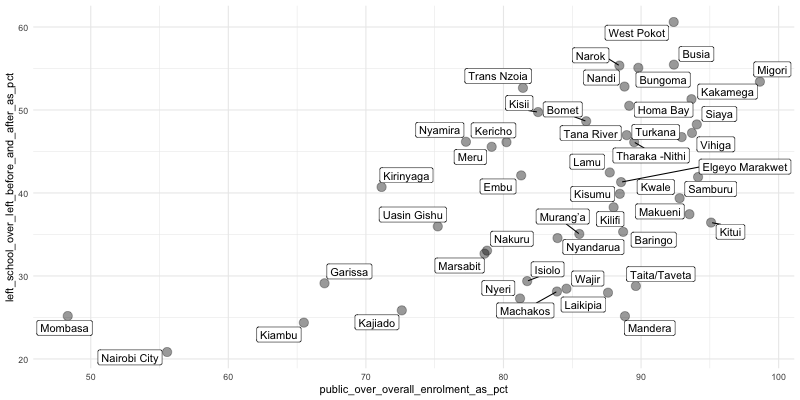

In [61]:
%%R -h 400 -w 800

ggplot(df_kenya_education_no_total_r) +
    aes(x=public_over_overall_enrolment_as_pct, y=left_school_over_left_before_and_after_as_pct, label = County) +
    geom_point(size=4, alpha=.4) +
    geom_label_repel()+
    theme_minimal()


* In most places there are more public school students than private school students. 
* Dropout rates are unclear for public vs private
* In Migori the dropout rate is basically the public school dropout rate
* Mandera remains intersting: very few private school students yet one of the lowest dropout rates in all of Kenya

# Why does the public school enrollment affect dropout rates so significantly 

* In the aggregate, what does it mean?
* Get data for public/ private:
>>

In [52]:
%%R -o df_no_nrb_residuals_dropout
#access to education
# guide for multivariable regression

df_no_nrb_residuals_dropout=df_kenya_education_no_total_r %>% 
    filter(County!="Nairobi City") %>%
    mutate(residuals_dropout=resid(model),
          residuals_z_dropout=(residuals_dropout-mean(residuals_dropout))/sd(residuals_dropout))

In [53]:
df_no_nrb_residuals_dropout.sort_values(by='residuals_dropout')[['County','residuals_dropout','residuals_z_dropout']]

,County,residuals_dropout,residuals_z_dropout
24,Mandera,-15.484998,-2.098981
20,Laikipia,-12.844821,-1.741106
38,Taita/Taveta,-10.743793,-1.456314
13,Kiambu,-10.530872,-1.427452
35,Nyeri,-9.139238,-1.238817
19,Kwale,-6.999588,-0.948789
22,Machakos,-6.802386,-0.922059
44,Vihiga,-6.481920,-0.878620
17,Kisumu,-6.058737,-0.821258
29,Murang’a,-6.039909,-0.818705


#### In my data, of 46 counties, only 5% should have a standard deviation higher than 2. 
* We already found that only a little above 2 counties should have a standard deviation higher than 2
* At the moment, here are the counties with higher standard deviations than 2

In [54]:
df_no_nrb_residuals_dropout[abs(df_no_nrb_residuals_dropout['residuals_z_dropout']) >= 2]

,...1,County,equitable_share_2020_21,equitable_share_2021_22_plus,conditional_grant_2020_21,conditional_grant_2021_22_plus,annual_own_source_revenue_2020_21,annual_own_source_revenue_2021_22_plus,total_revenue_2020_21,total_revenue_2021_22_plus,number_x,county,number_of_schools,total_enrolment,average_school_size,place,population,land_area_km_sq,pop_density_per_km_sq,county_ptr,public_enrolment,public_teachers,public_PTR,private_enrolment,private_teachers,private_PTR,overall_public_plus_private_enrolment,public_over_overall_enrolment_as_pct,overall_pri_ptr_county,overall_pri_ptr_enrolment,overall_pri_ptr_teachers,overall_pri_ptr_PTR,txtbk_no,txtbk_county,txtbk_grade_1,txtbk_grade_2,txtbk_grade_3,pupil_textbook_ratio,s_number_elec,county_elec,national_grid,solar,no_power,elec_table_total,no_power_pct,with_power_pct,with_national_grid_pct,complete_dig_SN,complete_dig_county,number_of_pri_schools_by_2016,number_of_schools_w_complete_digital_devices,pct_installed,detailed_digi_SN,detailed_digi_county,installed_learner_digi_devices,installed_learner_digi_devices.1,Installed_digi_content_server_and_wireless_routers,installed_projectors,installed_special_needs_edu_devices,nasmla_number,nasmla_county,mathematics_mean,mathematics_SE,english_mean,english_SE,kiswahili_mean,kiswahili_SE,county_lower,Unnamed: 0.1,name,capital,code,sub_counties,sub_counties_lower,Place_county_or_subcounty,total_and_gender,number_y,dont_know_number,dont_know_number_percent,not_stated_number,at_school_or_learning_institution_number,at_school_or_learning_institution_pct,after_completion_number,after_completion_pct,before_completion_number,before_completion_pct,never_been_to_school_or_learning_institution_number,never_been_to_school_or_learning_institution_pct,Unnamed: 0,male_Place_county_or_subcounty,male_total_and_gender,male_number,male_dont_know_number,male_dont_know_number_percent,male_not_stated_number,male_at_school_or_learning_institution_number,male_at_school_or_learning_institution_pct,male_after_completion_number,male_after_completion_pct,male_before_completion_number,male_before_completion_pct,male_never_been_to_school_or_learning_institution_number,male_never_been_to_school_or_learning_institution_pct,male_Place_county_or_subcounty_lower,name_lower,county_pupil_tr,pre_primary_pupil_teacher_ratio,secondary_pupil_teacher_ratio,female_Place_county_or_subcounty,female_total_and_gender,female_number,female_dont_know_number,female_dont_know_number_percent,female_not_stated_number,female_at_school_or_learning_institution_number,female_at_school_or_learning_institution_pct,female_after_completion_number,female_after_completion_pct,female_before_completion_number,female_before_completion_pct,female_never_been_to_school_or_learning_institution_number,female_never_been_to_school_or_learning_institution_pct,public_primary_enrolment_as_pct_of_overall_enrolment,never_been_to_school_over_population_pct,before_completion_over_population_pct,left_school_before_plus_after_completion,left_school_over_left_before_and_after_as_pct,after_completion_over_left_before_and_after_as_pct,never_been_to_school_over_left_before_and_after_pct,population_per_no_of_schools_over_area,residuals_dropout,residuals_z_dropout
24,41.0,Mandera,10222.95,11190.38,1158.45,760.72,143.31,200.04,11524.71,12151.14,24.0,Mandera,333.0,102503.0,308.0,Mandera,867457.0,25939.8,33.0,Mandera,91053.0,1239.0,73.0,11450.0,464.0,25.0,102503.0,88.829595,Mandera,102503.0,1703.0,60.0,24.0,Mandera,0.81,0.87,1.39,0.94,9.0,Mandera,14.0,206.0,62.0,282.0,21.985816,78.014184,4.964539,24.0,Mandera,198.0,198.0,100.0,24.0,Mandera,14090.0,396.0,198.0,198.0,NaN,24.0,Mandera,473.0,22.6,454.0,8.8,455.7,24.1,mandera,346.0,Mandera,Mandera,9.0,Mandera,mandera,MANDERA,MANDERA,775085.0,21776.0,2.8,138.0,168647.0,21.8,21483.0,2.8,7222.0,0.9,555819.0,71.7,161.0,MANDERA,Male,391182.0,10871.0,2.8,73.0,90664.0,23.2,14204.0,3.6,4118.0,1.1,271252.0,69.3,mandera,mandera,Mandera,85.3,26.1,MANDERA,Female,383873.0,10902.0,2.8,65.0,77980.0

# In Mandera, the dropout rate is "(not sure how to put it but lower than expected)"

### These outliers are therefore not remarkable as they fall within expectations

# Correlation Matrix

## Focusing on the x's in the multivariable regression

In [55]:

df_no_nrb_residuals_dropout_for_matrix=df_no_nrb_residuals_dropout[['total_revenue_2021_22_plus','average_school_size','overall_pri_ptr_PTR','public_over_overall_enrolment_as_pct','with_national_grid_pct']]

df_no_nrb_residuals_dropout_for_matrix

,total_revenue_2021_22_plus,average_school_size,overall_pri_ptr_PTR,public_over_overall_enrolment_as_pct,with_national_grid_pct
1,7309.56,193.0,25.0,88.697435,70.750000
2,7797.58,239.0,30.0,86.011929,96.382055
3,11855.51,449.0,44.0,89.801402,95.171537
4,8272.39,442.0,42.0,92.388185,98.876404
5,5627.98,265.0,27.0,88.550130,92.982456
6,6632.36,240.0,26.0,81.286967,97.112861
7,9318.24,255.0,45.0,66.991545,27.822581
8,8556.93,301.0,37.0,89.139084,97.197452
9,5637.57,216.0,27.0,81.723971,37.272727
10,10289.63,241.0,30.0,72.609110,49.233716


In [56]:
%%R -i df_no_nrb_residuals_dropout_for_matrix
library(reshape2)

df_no_nrb_residuals_dropout_for_matrix_long<-melt(df_no_nrb_residuals_dropout_for_matrix, id.vars=c("total_revenue_2021_22_plus"))




R[write to console]: 
Attaching package: ‘reshape2’


R[write to console]: The following object is masked from ‘package:tidyr’:

    smiths




In [57]:
# ! install.packages("corrplot")


R[write to console]: Loading required package: xts

R[write to console]: Loading required package: zoo

R[write to console]: 
Attaching package: ‘zoo’


R[write to console]: The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


R[write to console]: 
######################### Warning from 'xts' package ##########################
#                                                                             #
# The dplyr lag() function breaks how base R's lag() function is supposed to  #
# work, which breaks lag(my_xts). Calls to lag(my_xts) that you type or       #
# source() into this session won't work correctly.                            #
#                                                                             #
# Use stats::lag() to make sure you're not using dplyr::lag(), or you can add #
# conflictRules('dplyr', exclude = 'lag') to your .Rprofile to stop           #
# dplyr from breaking base R's lag() function.                                

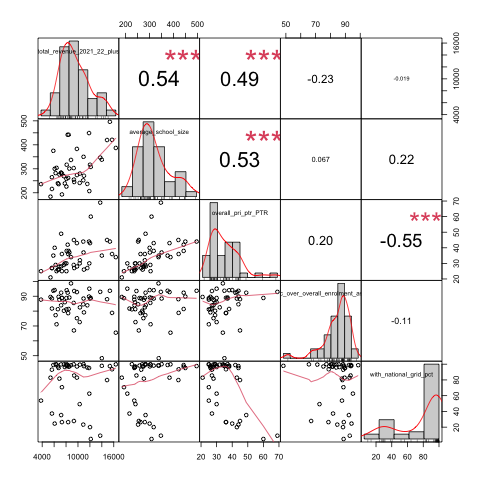

In [58]:
%%R

library("PerformanceAnalytics")
my_data <- df_no_nrb_residuals_dropout_for_matrix
chart.Correlation(my_data, histogram=TRUE, pch=19)

# More Data Analysis:
* Get a better model for dropout rates

# Regression for dropout rates vs access to education rates

In [62]:
%%R 
# guide for multivariable regression
model <- lm(left_school_over_left_before_and_after_as_pct ~never_been_to_school_or_learning_institution_pct, df_kenya_education_no_total_r)
summary(model)


Call:
lm(formula = left_school_over_left_before_and_after_as_pct ~ 
    never_been_to_school_or_learning_institution_pct, data = df_kenya_education_no_total_r)

Residuals:
     Min       1Q   Median       3Q      Max 
-20.5403  -6.8247  -0.3913   8.2084  22.0767 

Coefficients:
                                                 Estimate Std. Error t value
(Intercept)                                      41.76124    2.09781  19.907
never_been_to_school_or_learning_institution_pct -0.08168    0.07384  -1.106
                                                 Pr(>|t|)    
(Intercept)                                        <2e-16 ***
never_been_to_school_or_learning_institution_pct    0.274    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.21 on 45 degrees of freedom
Multiple R-squared:  0.02648,	Adjusted R-squared:  0.004842 
F-statistic: 1.224 on 1 and 45 DF,  p-value: 0.2745

